# torch-cam可解释性分析可视化-命令行

同济子豪兄 https://space.bilibili.com/1900783

代码运行云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1

2022-8-19

## 导入工具包

In [1]:
import os

import pandas as pd

from PIL import Image

## 命令行基本用法

In [4]:
!python torch-cam/scripts/cam_example.py --help

usage: cam_example.py [-h] [--arch ARCH] [--img IMG] [--class-idx CLASS_IDX]
                      [--device DEVICE] [--savefig SAVEFIG] [--method METHOD]
                      [--alpha ALPHA] [--rows ROWS] [--noblock]

Saliency Map comparison

optional arguments:
  -h, --help            show this help message and exit
  --arch ARCH           Name of the architecture (default: resnet18)
  --img IMG             The image to extract CAM from (default:
                        https://www.woopets.fr/assets/races/000/066/big-
                        portrait/border-collie.jpg)
  --class-idx CLASS_IDX
                        Index of the class to inspect (default: 232)
  --device DEVICE       Default device to perform computation on (default:
                        None)
  --savefig SAVEFIG     Path to save figure (default: None)
  --method METHOD       CAM method to use (default: None)
  --alpha ALPHA         Transparency of the heatmap (default: 0.5)
  --rows ROWS           Number of rows

## ImageNet预训练图像分类模型

In [2]:
# ImageNet1000类别名称与ID号
df = pd.read_csv('imagenet_class_index.csv')

In [3]:
df

,ID,class,wordnet,Chinese
0,0,tench,n01440764,丁鲷
1,1,goldfish,n01443537,金鱼
2,2,great_white_shark,n01484850,大白鲨
3,3,tiger_shark,n01491361,虎鲨
4,4,hammerhead,n01494475,锤头鲨
...,...,...,...,...
995,995,earthstar,n13044778,地星（菌类）
996,996,hen-of-the-woods,n13052670,多叶奇果菌
997,997,bolete,n13054560,牛肝菌
998,998,ear,n13133613,玉米穗


一些类别的名称与ID

网球 852

basketball 430

cowboy_boot 514

边牧犬 232

牧羊犬 231

虎斑猫 282、281

网球 852


## 图中只有一个类别

In [47]:
# 类别-边牧犬
!python torch-cam/scripts/cam_example.py \
        --img test_img/border-collie.jpg \
        --savefig output/output_border_collie.jpg \
        --arch resnet18 \
        --class-idx 232 \
        --rows 2

Figure(600x400)


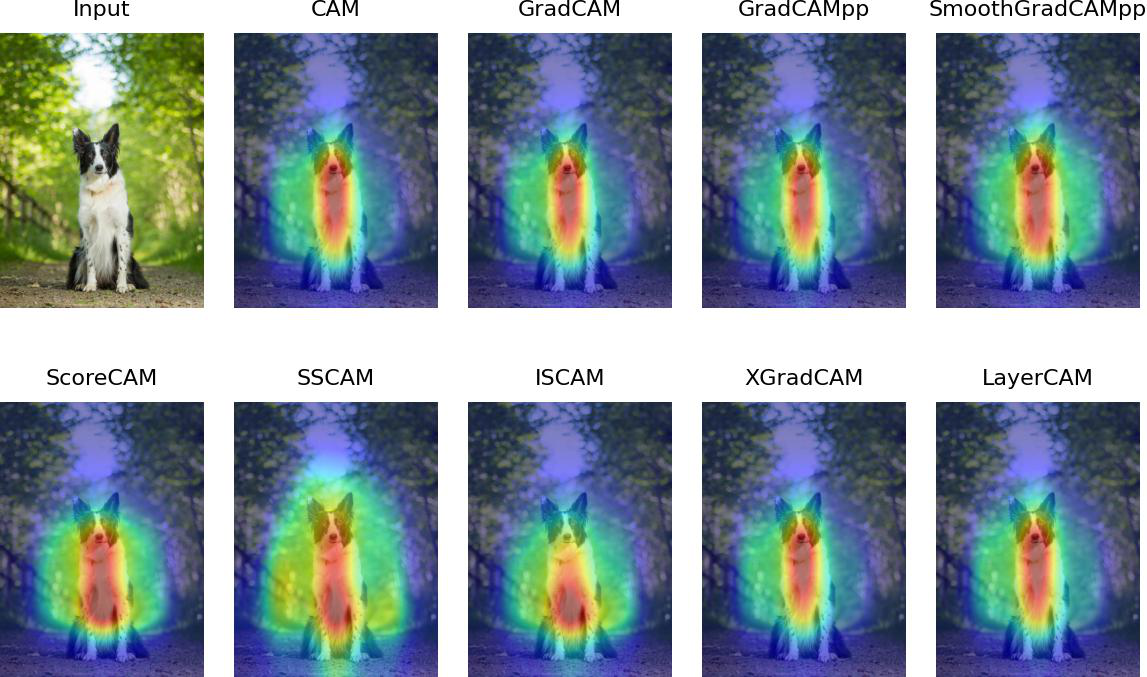

In [48]:
Image.open('output/output_border_collie.jpg')

## 图中有多个类别

In [42]:
# 类别-虎斑猫
!python torch-cam/scripts/cam_example.py \
        --img test_img/cat_dog.jpg \
        --savefig output/output_tabby.jpg \
        --arch resnet18 \
        --class-idx 282 \
        --rows 2

Figure(600x400)


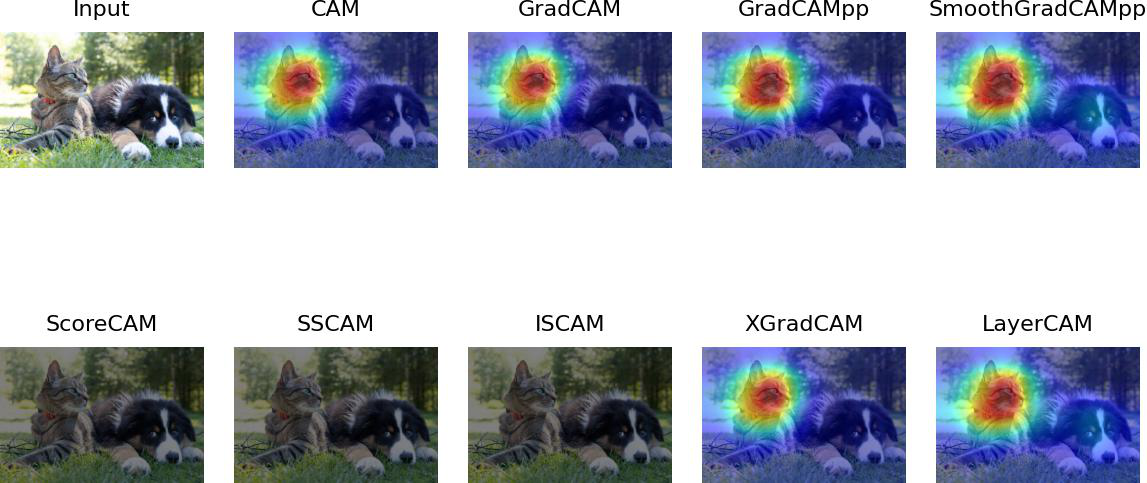

In [43]:
Image.open('output/output_tabby.jpg')

In [45]:
# 类别-边牧犬
!python torch-cam/scripts/cam_example.py \
        --img test_img/cat_dog.jpg \
        --savefig output/output_collie.jpg \
        --arch resnet18 \
        --class-idx 232 \
        --rows 2

Figure(600x400)


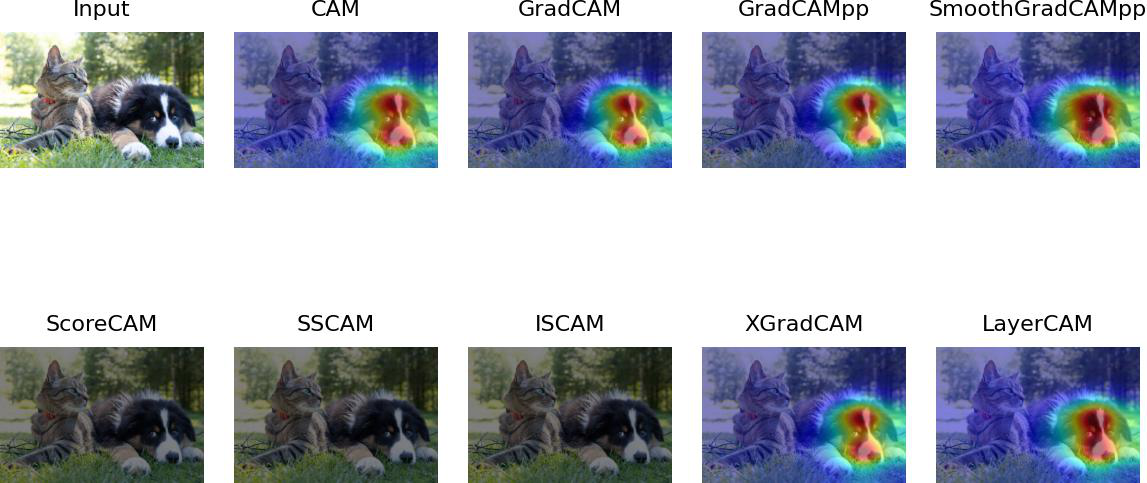

In [46]:
Image.open('output/output_collie.jpg')